In [1]:
from imports import *

/Users/jniedziela/.pyenv/versions/3.11.4/envs/master/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
df1 = pd.read_excel(EXCEL_DATA_DIR + 'Techniek_aanval_met_sprong_Ref_POSE_tabel.xlsx', index_col=0)
df1.rename(columns=MAPPINGS, inplace=True)
df2 = pd.read_excel(EXCEL_DATA_DIR + 'GX010044_Clip_6_POSE_tabel.xlsx', index_col=0)
df2.rename(columns=MAPPINGS, inplace=True)

df1.head()
df2.head()

,video_path,frame_number,person_id,nose_x,nose_y,nose_p,left_eye_x,left_eye_y,left_eye_p,right_eye_x,...,frame_file_path,hit_frame,min_wrist_y,phase,handedness,runup,jump_angle,position_to_ball,hit_arm_angle,fps
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,0,1,1041,1141,0.957478,1047,1135,0.477825,1028,...,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,0,1373,run-up,NaN,Rechterpas,NaN,NaN,NaN,59
1,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,1,1,1041,1141,0.957289,1047,1135,0.478524,1028,...,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,0,1373,run-up,NaN,NaN,NaN,NaN,NaN,59
2,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,2,1,1047,1142,0.949421,1052,1139,0.465829,1034,...,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,0,1380,run-up,NaN,NaN,NaN,NaN,NaN,59
3,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,3,1,1051,1143,0.944460,1055,1137,0.463315,1038,...,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,0,1383,run-up,NaN,NaN,NaN,NaN,NaN,59
4,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,4,1,1056,1148,0.955632,1063,1140,0.485472,1043,...,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,0,1382,run-up,NaN,NaN,NaN,NaN,NaN,59


/Users/jniedziela/Developer/master/time_series_comp/imports.py:172: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  out = ax.plot([start_x, end_x], [start_y, end_y], 'ro-', color=color)


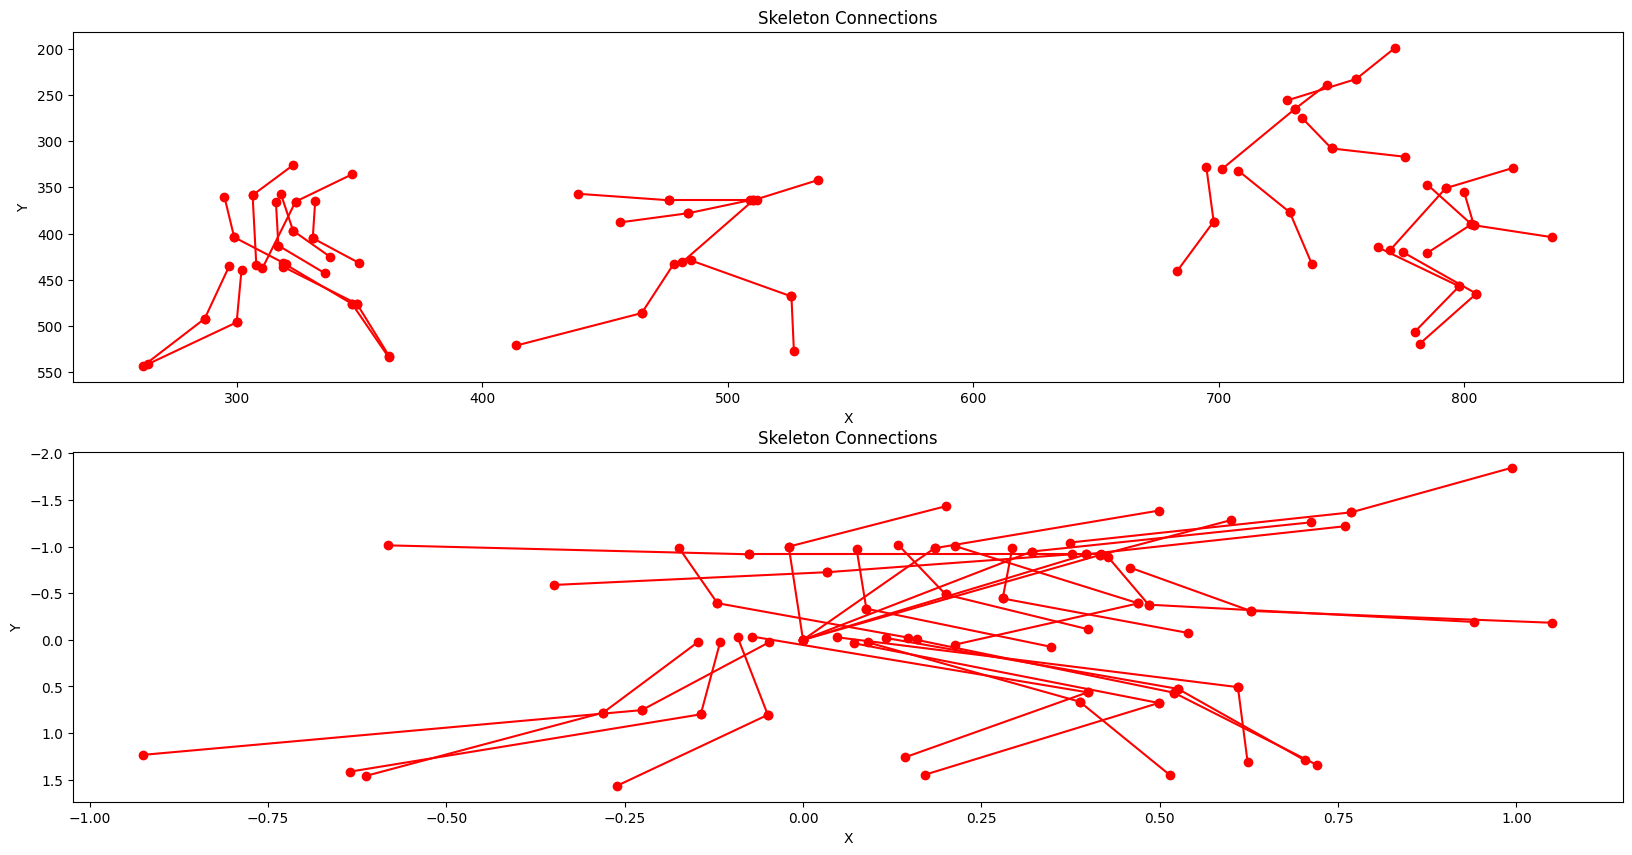

In [5]:
def normalise_dataframe_by_spine(df):
    # Calculate midpoints
    df['mid_hip_x'] = (df['left_hip_x'] + df['right_hip_x']) / 2
    df['mid_hip_y'] = (df['left_hip_y'] + df['right_hip_y']) / 2
    df['mid_shoulder_x'] = (df['left_shoulder_x'] + df['right_shoulder_x']) / 2
    df['mid_shoulder_y'] = (df['left_shoulder_y'] + df['right_shoulder_y']) / 2

    # Calculate spine length
    df['spine_length'] = (
        (df['mid_shoulder_x'] - df['mid_hip_x'])**2 +\
        (df['mid_shoulder_y'] - df['mid_hip_y'])**2
        )**0.5

    # Normalize the data
    for joint in ['nose','right_wrist', 'right_elbow', 'right_shoulder', 'left_wrist', 'left_elbow', 'left_shoulder', 'right_hip', 'right_knee', 'right_ankle', 'left_hip', 'left_knee', 'left_ankle', 'mid_hip', 'mid_shoulder']:
        df[f'{joint}_x_normalized'] = (df[f'{joint}_x'] - df['mid_hip_x']) / df['spine_length']
        df[f'{joint}_y_normalized'] = (df[f'{joint}_y'] - df['mid_hip_y']) / df['spine_length']

    # Selecting columns for demonstration
    normalized_columns = [col for col in df.columns if 'normalized' in col]
    df[normalized_columns].head()

    return df

df1 = normalise_dataframe_by_spine(df1)

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
for i in range(0, 100, 20):
    plot_sequence(df1, i, ax=ax[0])
    plot_sequence(df1, i, normalised=True, ax=ax[1])

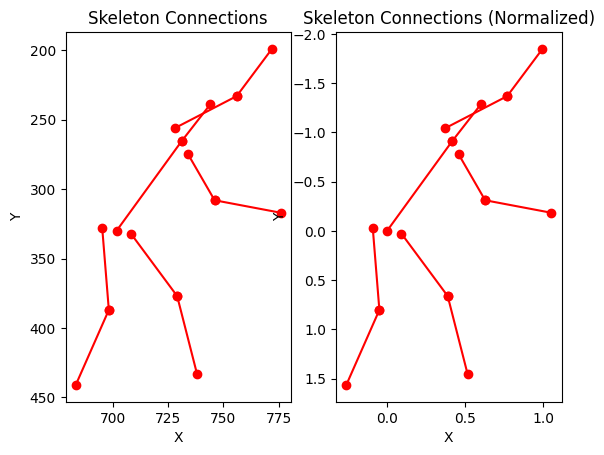

In [6]:
df = normalise_dataframe_by_spine(df1)
plot_frame(df, 60)